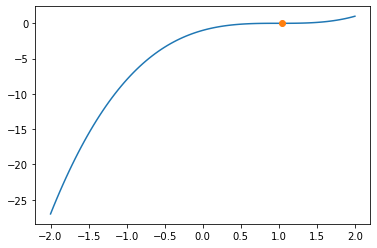

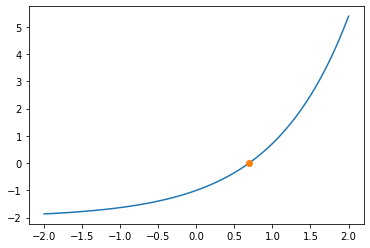

нуль функции f1 = 1.0356581986287225
нуль функции f2 = 0.6931472406153882


In [24]:
import numpy as np
from typing import Callable
from numpy import ndarray
from matplotlib import pyplot as plt

# задаем квадратичную функцию
def square(x:ndarray)->ndarray:
    return  np.power(x, 2)

# задаем кубическую параболу со сдвигом по x
def cubic(x:ndarray)->ndarray:
    return np.power(x-1, 3)

# задаем экспоненту со сдвигом по y
def shifted_exp(x:ndarray)->ndarray:
    return np.exp(x) - 2

# реализуем функцию вычисления производной
def deriv(func: Callable[[ndarray], ndarray],
          x: ndarray,
          delta: float = 0.001) -> ndarray:
    '''
    вычисляем производную от func в каждой точке input_. изменение аргумента = delta
    '''
    return (func(x + delta) - func(x)) / delta


# реализуем функцию вычисления нулей заданной функции на заданном интервале методом Ньютона
def calc_zeros(a:float, b:float, func:Callable[[ndarray], ndarray], eps:float=1e-4, num_iter:int=1000)->ndarray:
    assert a < b, 'начало интервала должно быть меньше конца'
    # начальное приближение
    if (func(a) == 0):
        return a
    if (func(b) == 0):
        return b
    x_prev = b
    x_current = x_prev
    iteration = 0
    """
    итеративно обновляем значения x_current. метод сходится быстро, однако если итераций слишком много
    - цикл останавливается
    """
    while abs(func(x_current)) > eps and iteration<=num_iter:
        x_current = x_prev - func(x_prev)/deriv(func, x_prev)
        x_prev = x_current
        iteration += 1
    return x_current

f1 = cubic
f2 = shifted_exp
x_zero_f1 = calc_zeros(-3, 3, f1)
x_zero_f2 = calc_zeros(-3, 3, f2)
n = 100
x = np.linspace(-2, 2, n)
plt.plot(x, f1(x), x_zero_f1, f1(x_zero_f1), 'o')
plt.show()
plt.plot(x, f2(x), x_zero_f2, f2(x_zero_f2), 'o')
plt.show()
print('нуль функции f1 = {}'.format(x_zero_f1))
print('нуль функции f2 = {}'.format(x_zero_f2))